# Udacity Data Analyst Nanodegree : Project P2 Investigate a Dataset     

### Shreyas Ramnath

### Date : 3rd July 2017

## Data Phase:

I chose the Lahman Baseball Dataset (http://www.seanlahman.com/baseball-archive/statistics/), as the dataset for my analysis. Below are some of the questions which occurred to me. I chose to analyze the balking property wherein the hitter is tricked by the pitcher. 
 
(http://www.dictionary.com/browse/balking)
### 1. Who is highest rated balker ?
### 2. Who is the highest rated non-balker ?
### 3. Are there more balks in a regular season compared to post season baseball?
### 4. What is the general trendline of the balks being called in baseball games?

##    Data Wrangling Phase:

### Missing Data:
Due to the unavailability of the post season balk data for Q3 between 1884-1892 & 2012, the balk and innings pitched were dropped for my pitchingpost table.

### Tables Merge:
For Q1 & Q2 the pitching and master table were merged to create a new table for balk information.

### Modification of Data:
The IPouts value was divided by 3, to get the innings as the former gave 3 outs per inning. The Balks per innings (BKIP) played for Q4-question and innings pitched per balk for Q1,Q2-questions is computed by dividing the balks and the re-computed innings pitched columns respectively

The (csv files/tables) required for my analysis were Master.csv, Batting.csv,PitchingPost.csv and Pitching.csv.

##    Analysis Phase:

In [1]:
#importing of pandas, seaborn and matplotlib packages
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib

#Loading files into the dataframes using pandas
master_Df = pd.read_csv('Master.csv')
batting_Df = pd.read_csv('Batting.csv')
pitchingpost_Df = pd.read_csv('PitchingPost.csv')
pitching_Df = pd.read_csv('Pitching.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# group by player (Regular)
IP_pitcher = (pitching_Df.groupby('playerID')['IPouts'].sum())/3
IP_pitcher.rename('IPP', inplace=True)

# for every balk the corresponding pitches
IP_balk_pitcher = IP_pitcher/(pitching_Df.groupby('playerID')['BK'].sum())
IP_balk_pitcher.rename('IPBK',inplace=True)

#Merge master and pitching tables
table1 = master_Df[['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame']]

#Perform an inner join on playerID on the master table
Q1 = table1.join(IP_pitcher, on='playerID', how='inner')
Q1 = Q1.join(pitching_Df.groupby('playerID')['BK'].sum(), on='playerID', how='inner')
Q1 = Q1.join(IP_balk_pitcher, on='playerID', how='inner').sort_values('IPBK',ascending=True)


###     1.  Who is the highest ranked balker ?

In [3]:
Q1 = Q1.loc[Q1['IPP'] > 100]
Q1.head(13)

,playerID,nameFirst,nameLast,debut,finalGame,IPP,BK,IPBK
5592,fortuti01,Tim,Fortugno,1992-07-20,1995-07-26,110.333333,6,18.388889
17995,waltege01,Gene,Walter,1985-08-09,1988-09-30,182.666667,9,20.296296
1590,booneda02,Danny,Boone,1981-04-11,1990-09-30,101.666667,5,20.333333
14484,rincoan01,Andy,Rincon,1980-09-15,1982-05-22,106.666667,5,21.333333
691,balleja01,Jay,Baller,1982-09-19,1992-08-31,156.333333,7,22.333333
1339,birkbmi01,Mike,Birkbeck,1986-08-17,1995-06-11,270.333333,12,22.527778
9427,krollga01,Gary,Kroll,1964-07-26,1969-07-12,159.333333,7,22.761905
984,beardmi01,Mike,Beard,1974-09-07,1977-05-02,118.000000,5,23.600000
1650,bouchde01,Denis,Boucher,1991-04-12,1994-05-21,146.000000,6,24.333333
9725,layanti01,Tim,Layana,1990-04-09,1993-07-26,102.666667,4,25.666667


Considering, for more than 100 inning pitches, Tim Fortugno is highest ranked balker with a balk for every ~18 inning pitches

###    2.  Who is the highest ranked non-balker?

In [4]:
Q2 = Q1.loc[(Q1['debut'] > '1950-01-01')&(Q1['BK'] == 0)].sort_values('IPP',ascending=False)
Q2.head(13)

,playerID,nameFirst,nameLast,debut,finalGame,IPP,BK,IPBK
14951,rueteki01,Kirk,Rueter,1993-07-07,2005-07-29,1918.000000,0,inf
8706,jonessa02,Sam,Jones,1951-09-22,1964-10-03,1643.333333,0,inf
11765,miltoer01,Eric,Milton,1998-04-05,2009-06-27,1582.333333,0,inf
9660,larsedo01,Don,Larsen,1953-04-18,1967-07-07,1548.000000,0,inf
1871,breweto01,Tom,Brewer,1954-04-18,1961-09-27,1509.333333,0,inf
6952,halldi01,Dick,Hall,1952-04-15,1971-09-25,1259.666667,0,inf
9993,lindbpa01,Paul,Lindblad,1965-09-15,1978-10-01,1213.666667,0,inf
1324,billich01,Chad,Billingsley,2006-06-15,2015-07-18,1212.333333,0,inf
15108,samarje01,Jeff,Samardzija,2008-07-25,2016-09-28,1195.000000,0,inf
12570,niesejo01,Jonathon,Niese,2008-09-02,2016-08-23,1189.333333,0,inf


Kirk Rueter has the highest number of innings pitched without a balk

###    3.  Are there more balks called per innings in a regular season compared to post season baseball?

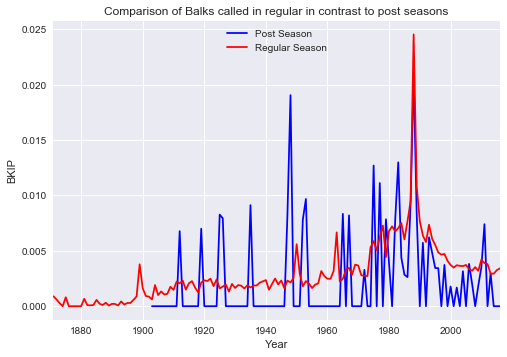

In [5]:
#Post Season
IP_peryear = (pitchingpost_Df.groupby('yearID')['IPouts'].sum()) / 3
balk_peryear = pitchingpost_Df.groupby('yearID')['BK'].sum()
balks_ip_peryear = balk_peryear/IP_peryear

#Regular Season
balk_ip_year = pitching_Df.groupby('yearID')['BK'].sum()/(pitching_Df.groupby('yearID')['IPouts'].sum()/3)
fig = balks_ip_peryear.plot(color='b', label='Post Season')
fig = balk_ip_year.plot(color='r', label='Regular Season')

xlabel('Year')
ylabel('BKIP')

fig.legend(loc='upper center')
fig.set_title('Comparison of Balks called in regular in contrast to post seasons')

As we can observe from the plot, the BKIP (balks per innings pitched) value for regular in red is much higher than the post blue season values. But just 
on the basis of calculating the mean, indeed we can observe the claimed trend, but that is not sufficient ground to accept this 
hypothesis. So we need to perform a Hypothesis test

###    3.1 Hypothesis Test

H0: μD, regular balks per inning - postseason balks per inning <= 0

HA: μD, regular balks per inning - postseason balks per inning > 0

H0 => Null hypothesis , HA => Alternative hypothesis, μD => Mean difference b/w balks/inning for regular season and post season

The population standard deviation is unknown. The means calculated are sample means as some data between years is missing and
there is no visible data relationship between the regular and post season data values.The central limit theorem is used as 
the data for the balks per innings pitched is somewhat normal. Hence suggest use of right tailed independent t-test and unpooled standard error (due to unequal variances) for comparing the two means which are independent of one another.

In [6]:
#Regular balk per individual & year
s_IP_sum =  (pitching_Df['IPouts']/3).sum()
s_balks_IP = pitching_Df['BK'] / (pitching_Df['IPouts'] /3)

#Weighted mean for above
s_IP_weight = (pitching_Df['IPouts']/3)/s_IP_sum
weight_s_mean = (s_IP_weight * s_balks_IP).sum()/s_IP_weight.sum()

#Standard deviation Weighted
#https://stats.stackexchange.com/questions/6534/how-do-i-calculate-a-weighted-standard-deviation-in-excel
sweighted_variance = ((s_IP_weight*((s_balks_IP - weight_s_mean)**2))).sum() 
sweighted_SD = (sweighted_variance / s_IP_weight.sum())**0.5

#Print statements to display ouput
print 'Regular Season'
print 'Innings played in the season ' + str(s_IP_sum)
print 'Weighted regular season standard deviation ' + str(sweighted_SD)
print 'Weighted regular season mean ' + str(weight_s_mean)

Regular Season
Innings played in the season 3804951.0
Weighted regular season standard deviation 0.00944984386164
Weighted regular season mean 0.00356404064073


In [7]:
#Post balk per individual & year
p_balks_bool = pd.notnull(pitchingpost_Df['BK']) 
p_IP = (pitchingpost_Df['IPouts'] / 3)[p_balks_bool]
p_balks = pitchingpost_Df['BK'][p_balks_bool]
p_IP_sum = p_IP.sum()
p_balks_IP = p_balks / p_IP

# Weighted mean for above
p_IP_weight = p_IP / p_IP_sum
weight_p_mean = (p_IP_weight * p_balks_IP).sum() / p_IP_weight.sum()

#Standard deviation weighted
# Reference - > https://stats.stackexchange.com/questions/6534/how-do-i-calculate-a-weighted-standard-deviation-in-excel
pweighted_variance = (p_IP_weight * ((p_balks_IP - weight_p_mean) ** 2)).sum()
pweighted_SD  = (pweighted_variance / p_IP_weight.sum()) ** 0.5

#Print statements to display output
print 'Post Season'
print 'Innings played in the season ' + str(p_IP_sum)
print 'Weighted post season standard deviation ' + str(pweighted_SD)
print 'Weighted post season mean ' + str(weight_p_mean)

Post Season
Innings played in the season 27072.0
Weighted post season standard deviation 0.0305838929747
Weighted post season mean 0.00251182033097


In [8]:
#Calculating unpooled standard error for two groups of independent data values
# Reference - > http://sites.stat.psu.edu/~ajw13/stat200_notes/10_twogroups/08_twogroups_print.html

y=((1/(s_IP_sum-1.))*(((sweighted_SD**2)/s_IP_sum)**2))+((1/(p_IP_sum-1.))*(((pweighted_SD**2)/p_IP_sum)**2))
unpooled_standardError = ((sweighted_SD**2/s_IP_sum) + (pweighted_SD**2/p_IP_sum))**0.5
print 'Unpooled Standard Error ' + str(unpooled_standardError)

#calculating t-value
t = (weight_s_mean-weight_p_mean)/unpooled_standardError
print 't value ' +str(t)

#calculating degrees of freedom
x=(((sweighted_SD**2)/s_IP_sum)+((pweighted_SD**2)/p_IP_sum))**2
degOffreedom = x / y
print 'Degrees of Freedom ' +str(degOffreedom)

#Calulating value of p from given df and t values
#http://www.socscistatistics.com/pvalues/tdistribution.aspx
print 'p-value '+str(0)

Unpooled Standard Error 0.000185943089911
t value 5.6588298617
Degrees of Freedom 27107.7888088
p-value 0


Hence now we have substantial evidence for any level of significance that the frequency of balks in the regular season far
exceeds that of post seasons

###     4.What is the general trendline of the balks being called in baseball games ?

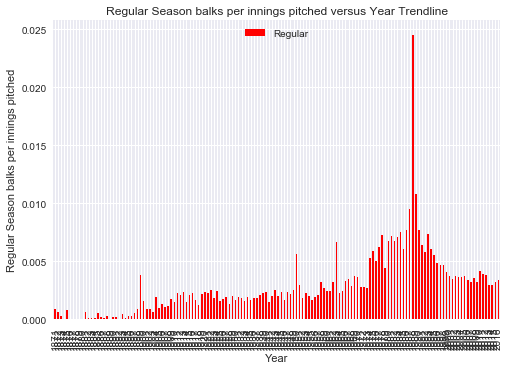

In [9]:
# From (regular season)
fig = balk_ip_year.plot(kind='bar', color='r', label='Regular')
xlabel('Year')
ylabel('Regular Season balks per innings pitched')
fig.legend(loc='upper center')
fig.set_title('Regular Season balks per innings pitched versus Year Trendline')

As we can observe since 1880 the frequency of calling balks is on an increasing trend. We can observe that around 1987-1999 the 
frequency of balks maxed out a ~40 per inning. Due to this reason this was called as the year of the balk
(http://www.baseball-reference.com/bullpen/Balk).
Also the peaks in the balks called in certain years coincide with the years during which enforcements and rule changes were brought in. (http://reconditebaseball.blogspot.ca/2008/08/balks-story-of-1988-major-league.html)

## Conclusion

For the caught stealing ("CS") column in the Batting table, there are big gaps in the data up until 1920 and smaller gaps in 
the data from 1920 to 1950 altough data from 1951 to present is complete.
There is no postseason balk data from 1884 to 1892 and 2012 hence, the innings pitched and balk data for these seasons in 
the PitchingPost table were required to be excluded. 
It would have been better if, there was a table which contained data related specifically to balk-related record holders.
If the "IPouts" data would have been per innings instead of 3 outs, the need to divide the innings pitched by 3 throughout the analysis could have been avoided.
Balks per inning pitched and innings pitched per balk information was not readily available, hence needed due calculation.
Due to reasons in 3.1, the idea of using right tailed independent t-test and unpooled standard error for the mean comparison is
justified, hence the statistical tests can be trusted completely to verify the hypothesis